<a href="https://colab.research.google.com/github/Lessinger/Pyemens/blob/main/Pyemens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Python Program

In [ ]:
import snap7
import time
import struct
import ctypes
import requests

In [ ]:
#Telegram config
telegram_bot_token = 'bot_token'
chat_id = 'chat_id'

def enviar_mensagem_telegram(mensagem):
    url = f'https://api.telegram.org/bot{telegram_bot_token}/sendMessage'
    params = {'chat_id': chat_id, 'text': mensagem}
    requests.post(url, params=params)

In [ ]:
clp = snap7.client.Client()
try:
    #PLC Connection
    clp.connect('192.168.1.236', 0, 1) #IP address, rack, slot
    print("Conectado!")
    while True:
        DB_s71200 = clp.db_read(1,0,14) #DB number, First address, byte size

        #extract received values
        Temp_Act = snap7.util.get_int(DB_s71200,2)
        Temp_Set = snap7.util.get_int(DB_s71200,4)
        Buffer = snap7.util.get_int(DB_s71200,6)
        Buffer1 = snap7.util.get_real(DB_s71200,10)

        #alarm that the temperature pass 100ºC
        if Temp_Act > 100:
            enviar_mensagem_telegram(f"Alerta de Temperatura: {Temp_Act} graus!")

        novo_valor_dado5 = int(input("Entre com valor para Set Temperatura  (INT): "))
        novo_valor_dado6 = int(input("Entre com valor para Buffer (INT): "))
        novo_valor_dado7 = float(input("Entre com valor para Buffer1 (REAL): "))

        novo_valor_dado5_bytes = struct.pack('>h', novo_valor_dado5) #INT
        novo_valor_dado6_bytes = struct.pack('>h', novo_valor_dado6) #INT
        novo_valor_dado7_bytes = struct.pack('>f', novo_valor_dado7) #REAL

        clp.db_write(1, 4, novo_valor_dado5_bytes) #DB1, offset 4
        clp.db_write(1, 6, novo_valor_dado6_bytes) #DB1, offset 6
        clp.db_write(1, 10, novo_valor_dado7_bytes) #DB1, offset 10

        #Read Bool value at DB
        dado_bytes = clp.db_read(1, 0, 5) #DB number, First address, byte size
        dado_bool_0_0 = bool(ctypes.c_byte(dado_bytes[0]).value)
        dado_bool_0_1 = bool(ctypes.c_byte(dado_bytes[1]).value)
        dado_bool_0_2 = bool(ctypes.c_byte(dado_bytes[2]).value)
        dado_bool_0_3 = bool(ctypes.c_byte(dado_bytes[3]).value)
        dado_bool_0_4 = bool(ctypes.c_byte(dado_bytes[4]).value)

        print("Valor BOOL em 0.0:", dado_bool_0_0)
        print("Valor BOOL em 0.1:", dado_bool_0_1)
        print("Valor BOOL em 0.2:", dado_bool_0_2)
        print("Valor BOOL em 0.3:", dado_bool_0_3)
        print("Valor BOOL em 0.4:", dado_bool_0_4)

        #Read Bool value at the DB
        dado_bytes8 = clp.db_read(1, 8, 1)
        dado_bool_8_0 = bool(ctypes.c_byte(dado_bytes8[0]).value)
        print("Valor BOOL em 8.0:", dado_bool_8_0)

        #Confirm new bool value
        novo_valor_bool_8_n = input("Insira um novo valor Bool 8.0(True/False): ")
        novo_valor_bool_8_n = bool(novo_valor_bool_8_n.lower() == 'true')

        #Read bool
        dado_bytes14 = clp.db_read(1, 14, 1)
        dado_bool_14_0 = bool(ctypes.c_byte(dado_bytes14[0]).value)
        print("Valor BOOL em 14.0:", dado_bool_14_0)

        #Confirm new value
        novo_valor_bool_14_n = input("Insira um novo valor Bool 14.0 (True/False): ")
        novo_valor_bool_14_n = bool(novo_valor_bool_14_n.lower() == 'true')

        #Write new value to the DB
        novo_valor_bool_8_n_bytes = struct.pack('?', novo_valor_bool_8_n)
        clp.db_write(1, 8, novo_valor_bool_8_n_bytes)

        novo_valor_bool_14_n_bytes = struct.pack('?', novo_valor_bool_14_n)
        clp.db_write(1, 14, novo_valor_bool_14_n_bytes)

        print("Temperatura Atual: ", Temp_Act, "\nTemperatura Set: ", Temp_Set, "\nBuffer: ", Buffer, "\nBuffer1: ", Buffer1)

        #10 seg delay
        time.sleep(10)

In [ ]:
except KeyboardInterrupt:
    print("\nPrograma encerrado pelo usuário")

In [ ]:
finally:
    #Confirm that the connection between PLC and Python was fineshed
    clp.disconnect()

# Confirmation of connection

It gives an feedback to the operator that the application was successful connected, and it print the current IP adress of the connected PLC.

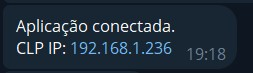

# Status

Shows the given status of the 5 first bits of the informed Byte, current temperature, status from two boolean informations on the DB

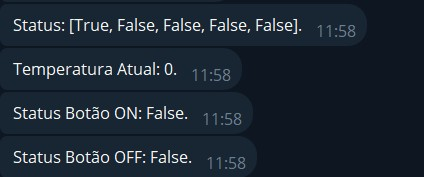

# Temperatura Alarm

It sent a message to the operator if the temperature exceeds the target

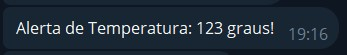

# Confirmation of disconnection

Operator receives an confirmation that the communication was finished

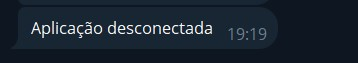